# Workshop 4
## Jose Pablo Cobos Austria
## A01274631

## 3.4 CHALLENGE: Run and interpret a market regression model

In [3]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['ALFAA.MX','^MXX'],start="01/01/2018", end="07/31/2022",interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAA','MXX']

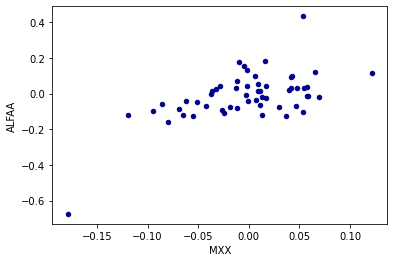

In [4]:
sr.plot.scatter(x='MXX', y='ALFAA',c='DarkBlue')
plt.show()

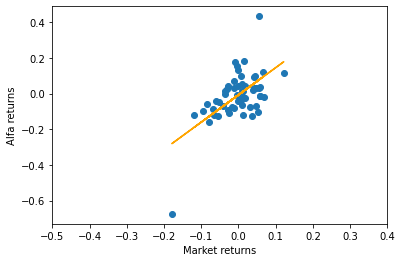

In [5]:
# Scatter plots can be misleading when ranges of X and Y are very different.
# In this case, Alfa had a very bad month in the COVID crisis with more than 60% loss!! 
# Then, we can re-do the scatter plot trying to make the X and Y axis using the same range of values 
plt.clf()
x=sr['MXX']
y = sr['ALFAA']
plt.scatter(x, y)
# Now I add the regression line:
b1,b0 = np.polyfit(x,y,1)
yfit = b0+b1*x

plt.plot(x, yfit,c="orange")

plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

In [6]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()

sns.regplot(x, y)
plt.xticks(np.arange(-0.50,0.5,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 432x288 with 0 Axes>

In [7]:
import statsmodels.api as sm
X = sm.add_constant(x)

mkmodel = sm.OLS(y,X).fit()

print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     29.10
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.63e-06
Time:                        03:55:53   Log-Likelihood:                 43.901
No. Observations:                  55   AIC:                            -83.80
Df Residuals:                      53   BIC:                            -79.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0075      0.015     -0.501      0.6

In [8]:
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAA ~ MXX',data=sr).fit()

print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:                  ALFAA   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     29.10
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.63e-06
Time:                        03:56:01   Log-Likelihood:                 43.901
No. Observations:                  55   AIC:                            -83.80
Df Residuals:                      53   BIC:                            -79.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0075      0.015     -0.501      0.6

In [9]:
# Using matrix algebra to estimate the beta coefficients:
sr['constant'] = 1
selcols = ['constant','MXX']
x = sr[selcols].values
y = sr['ALFAA'].values

xtx = np.matmul(x.transpose(),x)
xty = np.matmul(x.transpose(),y)
invtxt = np.linalg.inv(xtx)

betas = np.matmul(invtxt,xty)
betas

array([-0.00750561,  1.5273763 ])